In [263]:
import pandas as pd

In [264]:
SRR_list = open("/data/lohia/gene_distance_expresseion/hi_c_data_processing/software/SRR_list.sh", "r")
counter = 0
list_of_SRR = []

for aline in SRR_list:
    list_of_SRR.append(aline.strip())
SRR_list.close()

In [265]:
SRR_info_list = []
for f_name in list_of_SRR:
    df = pd.read_csv('/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/software/SRR_info/SRR_info_%s_10.csv' %(f_name), sep='\t')
    SRR_info_list.append(df)

In [266]:
SRA_info = pd.concat(SRR_info_list)

In [267]:
SRA_info

SRA    chr  resolution  maximum_read  map_resolution  \
0   SRR10010143_raw_network   chrX          10          61.0           106.0   
1   SRR10010143_raw_network  chr22          10         116.0             0.0   
2   SRR10010143_raw_network  chr21          10          55.0             0.0   
3   SRR10010143_raw_network  chr20          10         148.0           290.0   
4   SRR10010143_raw_network  chr19          10         200.0           104.0   
..                      ...    ...         ...           ...             ...   
18   SRR9993986_raw_network   chr5          10         716.0           773.0   
19   SRR9993986_raw_network   chr4          10         369.0           705.0   
20   SRR9993986_raw_network   chr3          10         275.0           734.0   
21   SRR9993986_raw_network   chr2          10         330.0           845.0   
22   SRR9993986_raw_network   chr1          10         465.0           661.0   

     maximum_bias  
0        0.000964  
1   525597.268016  
2   384470.129345  
3        0.000943  
4        0.000966  
..            ...  
18       0.000946  
19       0.000971  
20       0.000941  
21       0.000828  
22       0.000962  

[29569 rows x 6 columns]

In [268]:
SRA_info_chr = SRA_info[SRA_info['chr']=='chr11']

In [269]:
y = SRA_info.groupby(['SRA'])['map_resolution'].median().reset_index()

In [281]:
y[y['map_resolution'] >= 1000]

SRA  map_resolution
36    SRR10229696_raw_network          3214.0
37    SRR10229697_raw_network          3219.2
38    SRR10229698_raw_network          3106.0
69    SRR10539836_raw_network          1013.0
77    SRR10539844_raw_network          1005.8
79    SRR10539846_raw_network          1030.0
111   SRR10575119_raw_network          1023.0
146   SRR10620237_raw_network          1581.0
184   SRR11149243_raw_network          1367.0
185   SRR11149244_raw_network          1299.0
187   SRR11149246_raw_network          1120.2
188   SRR11149247_raw_network          1162.0
191   SRR11149250_raw_network          1046.0
193   SRR11207827_raw_network          1844.0
194   SRR11207828_raw_network          2625.4
195   SRR11207829_raw_network          2315.0
196   SRR11207830_raw_network          2261.2
197   SRR11207831_raw_network          1512.0
198   SRR11207832_raw_network          2084.0
199   SRR11207833_raw_network          2208.0
272   SRR12185168_raw_network          1035.0
880    SRR7506533_raw_network          3019.8
882    SRR7506535_raw_network          3358.4
890    SRR7506543_raw_network          2964.0
897    SRR7506667_raw_network          1010.0
1163   SRR9621903_raw_network          1808.0
1164   SRR9621904_raw_network          1205.0
1169   SRR9621909_raw_network          1487.6
1170   SRR9621910_raw_network          1584.0

In [280]:
with open('/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/software/SRR_info/SRR_list_10_1000_10KB.sh', 'w') as filehandle:
    for listitem in y[(y['map_resolution'] >= 10) & (y['map_resolution'] <= 1000)]['SRA'].to_list():
        filehandle.write('%s\n' % listitem)

In [279]:
y[(y['map_resolution'] >= 10) & (y['map_resolution'] <= 1000)]['SRA'].to_list()

['SRR10010143_raw_network',
 'SRR10010144_raw_network',
 'SRR10010145_raw_network',
 'SRR10010146_raw_network',
 'SRR10010147_raw_network',
 'SRR10010148_raw_network',
 'SRR10035372_raw_network',
 'SRR10035373_raw_network',
 'SRR10035374_raw_network',
 'SRR10035375_raw_network',
 'SRR10035376_raw_network',
 'SRR10035377_raw_network',
 'SRR10035378_raw_network',
 'SRR10035379_raw_network',
 'SRR10035380_raw_network',
 'SRR10035381_raw_network',
 'SRR10035382_raw_network',
 'SRR10035383_raw_network',
 'SRR10109414_raw_network',
 'SRR10109415_raw_network',
 'SRR10109416_raw_network',
 'SRR10109417_raw_network',
 'SRR10109418_raw_network',
 'SRR10109419_raw_network',
 'SRR10109420_raw_network',
 'SRR10109421_raw_network',
 'SRR10109422_raw_network',
 'SRR10109423_raw_network',
 'SRR10109424_raw_network',
 'SRR10109425_raw_network',
 'SRR10168903_raw_network',
 'SRR10168904_raw_network',
 'SRR10168905_raw_network',
 'SRR10214691_raw_network',
 'SRR10229694_raw_network',
 'SRR10229695_raw_ne

(0, 100)

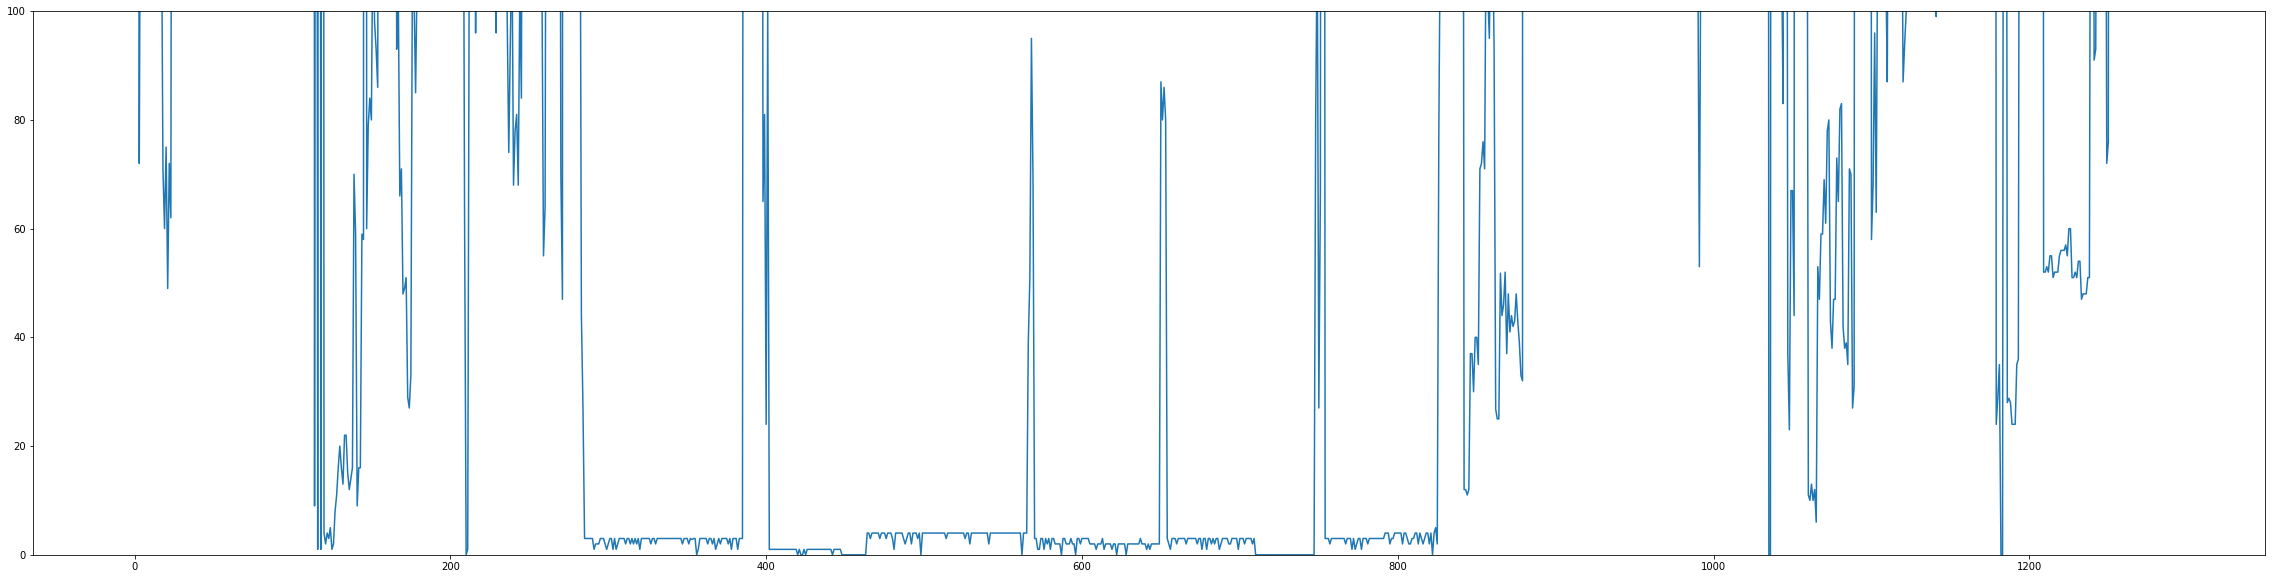

In [238]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(40,10))
ax.plot(y.reset_index().index, y['map_resolution'])
ax.set_ylim([0,100])
#ax.set_xlim([0,800])

/home/lohia/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


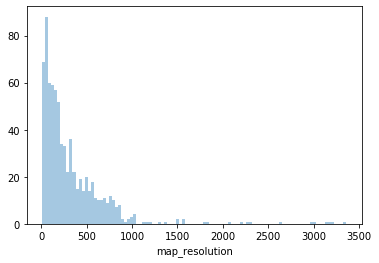

In [239]:
import seaborn as sns
ax = sns.distplot(y[y['map_resolution'] > 10]['map_resolution'],  hist=True, kde=False, bins=100)
#ax.set_xlim(0, 1000)

In [180]:
y = SRA_info_chr[SRA_info_chr['map_resolution'] > 10]

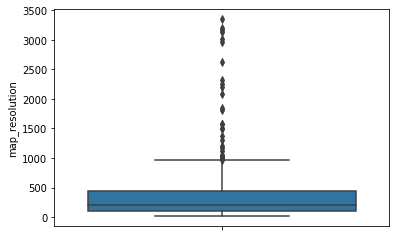

In [241]:

sns.boxplot(y='map_resolution',
                         data=y[y['map_resolution'] > 10]
                         #,hue='chr'
                   )

In [247]:
import numpy as np
np.quantile(y['map_resolution'], 0.5)

56.0

In [226]:
np.quantile(SRA_info[SRA_info['map_resolution'] > 10]['map_resolution'], .95)

975.0

In [75]:
SRA_info_chr['map_resolution'].median()

472.40000000000003

In [20]:
import seaborn as sns
fig, axes = plt.subplots(figsize=(40,10))

NameError: name 'plt' is not defined

/home/lohia/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


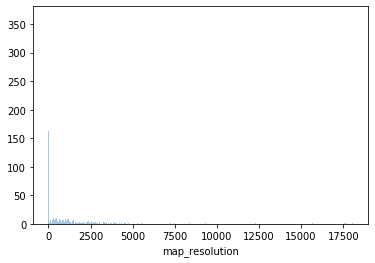

In [9]:
import seaborn as sns
ax = sns.distplot(SRA_info_chr['map_resolution'],  hist=True, kde=False, bins=1000)
#ax.set_xlim(0, 200)

In [3]:
import pandas as pd
chunk_info_list = []
split_type_chunks = ['agg']
chr_list = list(range(1,23)) + ['X']
for chunk in [1, 10, 100, 200, 300, 400, 500, 600, 700, 800]:
    for i in range(1,11):
        for chrm in chr_list:
            df = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/software/shuff_exp_split/chunk_info_slice_{chunk}_shufind_{i}_EXP_10_chr{chrm}.csv', sep='\t', names=['SRA' , 'chr' , 'resolution' , 'maximum_read' , 'map_resolution' , 'maximum_bias'])
            df['chunk'] = chunk
            chunk_info_list.append(df)

In [188]:
chunk_info_list = []
split_type_chunks = ['agg']
chr_list = list(range(1,2)) + ['X']
for chunk in split_type_chunks:
    f_name_list = open(f'/data/lohia/gene_distance_expresseion/hi_c_data_processing/software/{chunk}_exp_split/grouped_filenames.sh', "r")    
    for f_name in f_name_list:
        for chrm in chr_list:
            f_name = f_name.strip()
            df = pd.read_csv(f'/data/lohia/gene_distance_expresseion/hi_c_data_processing/software/{chunk}_exp_split/chunk_info_{f_name}_10_chr{chrm}.csv', sep='\t', names=['SRA' , 'chr' , 'resolution' , 'maximum_read' , 'map_resolution' , 'maximum_bias'])
            df['chunk'] = chunk
            chunk_info_list.append(df)

In [56]:
chunk_info_list = []
chr_list = list(range(1,23)) + ['X']
for shufind in range(1,727):
    for chrm in chr_list:
            df_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/software/shuff_exp_split/chunk_info_slice_1_shufind_{shufind}_EXP_10_chr{chrm}.csv', sep='\t', names=['SRA' , 'chr' , 'resolution' , 'maximum_read' , 'map_resolution' , 'maximum_bias'])  
            
            df_result = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/results/gene_basis_auc/simple_auc_jaccard_coefficient_slice_1_shufind_{shufind}_EXP_10_VC_rank_tss_90_entire_genes.txt', sep="\t", header=None, names= ['resol','chr', 'auc', 'accuracy', 'norm'])
            df_result['shufind'] = shufind
            df_result = df_result[df_result['chr']=='%s' %chrm]
            df_result['map_resolution'] = df_depth['map_resolution'].to_list()[0]
            chunk_info_list.append(df_result)

In [57]:
chunk_info = pd.concat(chunk_info_list) 

In [58]:
d2 = chunk_info.groupby(['shufind', 'chr', 'map_resolution'])['auc'].median().reset_index()

In [64]:
d2[d2>=]

0.0

In [41]:
d2['map_resolution'] = d2['map_resolution']/ 10

In [42]:
d2['map_resolution'] = d2['map_resolution'].astype('int')

In [53]:
d2

shufind chr  map_resolution       auc
0         1   1           127.0  0.519869
1         1   2           157.0  0.518439
2         2   1           301.0  0.519849
3         2   2           368.0  0.529629
4         3   1           236.0  0.527983
5         3   2           291.0  0.527080
6         4   1            72.0  0.515859
7         4   2            85.0  0.512347
8         5   1           153.0  0.521477
9         5   2           179.0  0.518602
10        6   1           415.0  0.539930
11        6   2           488.0  0.529502

100 simple


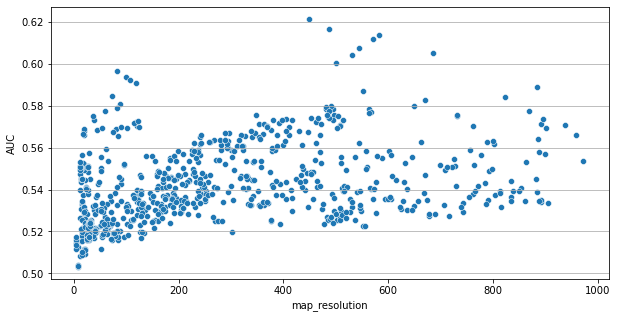

In [68]:
#original
for resoultion in [100]:
    for case in ['simple']:
        print (resoultion, case)
        #100 contacts
        import seaborn as sns
        import matplotlib.pyplot as plt
        fig, axes = plt.subplots(figsize=(10,5))
        #grouped = df_scores.groupby(['threshold'])

        #bp = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
        #bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
        sns.scatterplot(x='map_resolution', y='auc',
                         data=d2[d2['chr']=='1'] , 
                         palette='coolwarm', ax=axes, 
                   )
        #ax2 = axes.twinx()
        #sns.catplot(data=df_1,  x='type', y='auc' ,hue='chr', kind="swarm")
        #plt.axhline(1.3)
        #sns.scatterplot(data=man_u_val, x="resolution", y="p_val_log")
        #bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
        #axes.set_title('Predicting structure similarity from expression')
        axes.yaxis.grid(True)
        #axes.set_xlabel('Co-expression')
        axes.set_ylabel('AUC')
        #axes.axhline(0.738)
        #axes.set_xlim([1,250])
        #plt.setp(bp['fliers'], markersize=3.0)

        plt.show()

In [192]:
chunk_info.groupby(['chr', 'SRA'])['map_resolution'].median()

chr   SRA         
chr1  1000_agg_EXP    245075.0
      100_agg_EXP      60194.0
      10_agg_EXP        2421.0
      1100_agg_EXP    284875.0
      1200_agg_EXP    322733.0
                        ...   
chrX  70_agg_EXP       28412.4
      800_agg_EXP     111720.2
      80_agg_EXP       33257.6
      900_agg_EXP     138840.0
      90_agg_EXP       40475.4
Name: map_resolution, Length: 552, dtype: float64

/home/lohia/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0, 500)

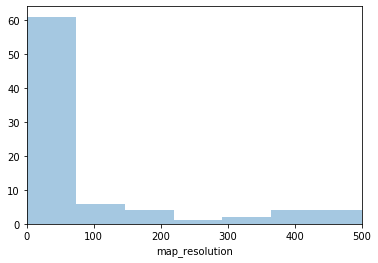

In [184]:
import seaborn as sns
chunk = chunk_info[chunk_info['chunk']==100]
ax = sns.distplot(chunk['map_resolution'],  hist=True, kde=False, bins=1000)
ax.set_xlim(0, 500)

In [202]:
chunk_info[chunk_info['SRA']=='1300_agg_EXP'].groupby(['chr', 'SRA'])['map_resolution'].median()

chr    SRA         
chr1   1300_agg_EXP    361510.0
chr10  1300_agg_EXP    356213.4
chr11  1300_agg_EXP    366224.0
chr12  1300_agg_EXP    377594.0
chr13  1300_agg_EXP    258910.6
chr14  1300_agg_EXP       106.0
chr15  1300_agg_EXP       347.8
chr16  1300_agg_EXP     23727.4
chr17  1300_agg_EXP    265225.0
chr18  1300_agg_EXP    306989.2
chr19  1300_agg_EXP    301345.4
chr2   1300_agg_EXP    385500.4
chr20  1300_agg_EXP    364381.0
chr21  1300_agg_EXP        24.0
chr22  1300_agg_EXP         0.0
chr3   1300_agg_EXP    381924.8
chr4   1300_agg_EXP    339291.2
chr5   1300_agg_EXP    393677.2
chr6   1300_agg_EXP    378145.0
chr7   1300_agg_EXP    370590.0
chr8   1300_agg_EXP    364098.6
chr9   1300_agg_EXP     56290.2
chrX   1300_agg_EXP    243356.2
Name: map_resolution, dtype: float64

100 simple


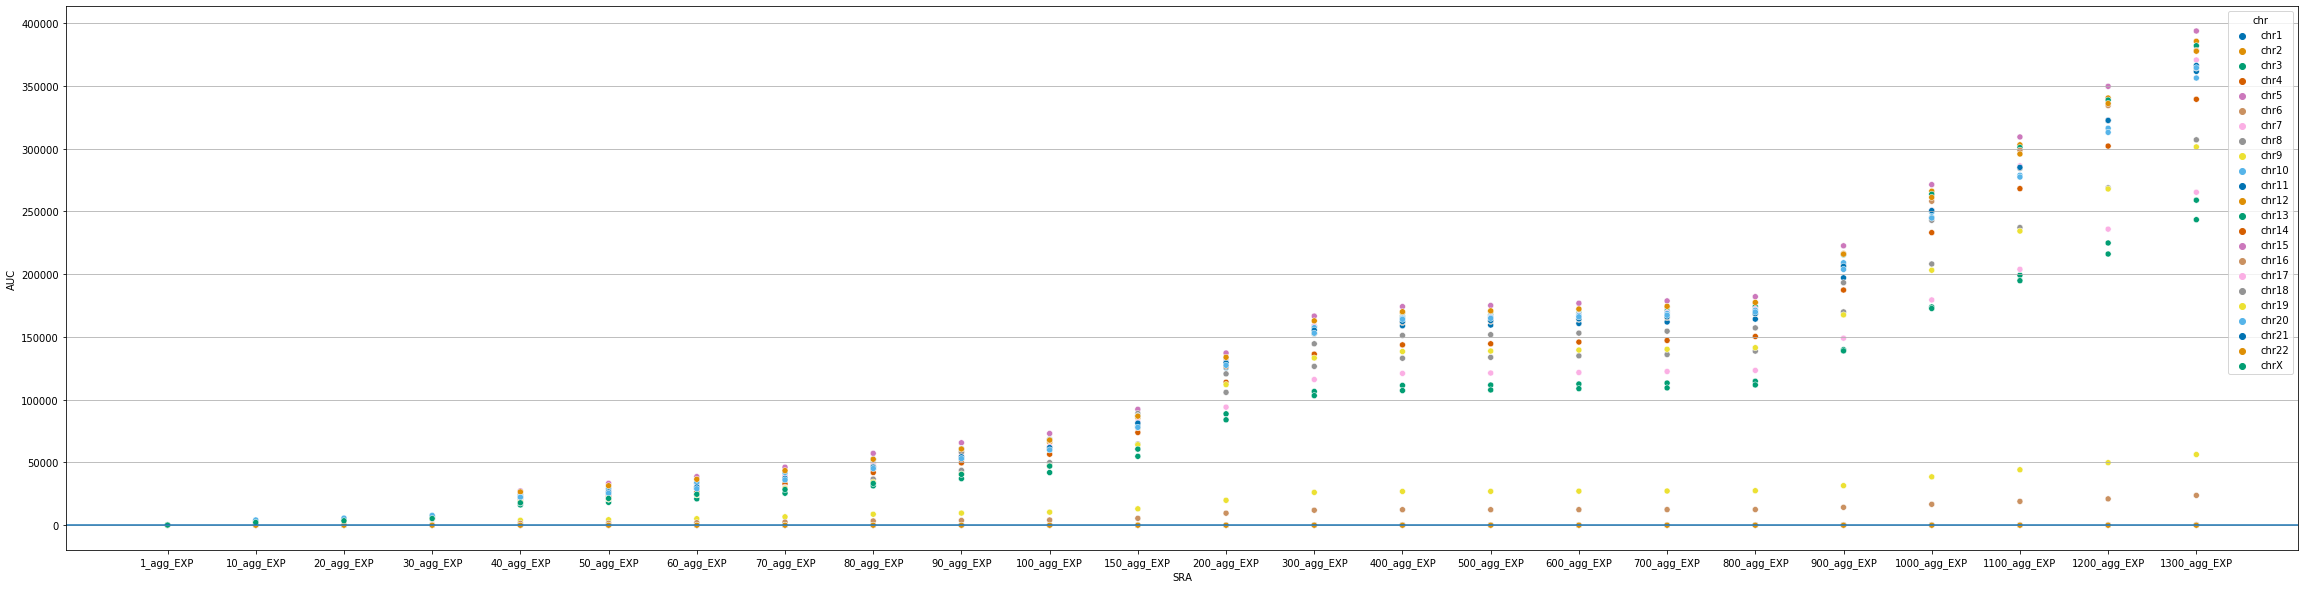

In [199]:
#original
for resoultion in [100]:
    for case in ['simple']:
        print (resoultion, case)
        #100 contacts
        import seaborn as sns
        import matplotlib.pyplot as plt
        fig, axes = plt.subplots(figsize=(40,10))
        #grouped = df_scores.groupby(['threshold'])

        #bp = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
        #bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
        sns.scatterplot(y='map_resolution', x='SRA',
                         data=chunk_info , 
                         palette="colorblind", ax=axes
                         ,hue='chr'
                   )
        #ax2 = axes.twinx()
        #sns.catplot(data=df_1,  x='type', y='auc' ,hue='chr', kind="swarm")
        #plt.axhline(1.3)
        #sns.scatterplot(data=man_u_val, x="resolution", y="p_val_log")
        #bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
        #axes.set_title('Predicting structure similarity from expression')
        axes.yaxis.grid(True)
        #axes.set_xlabel('Co-expression')
        axes.set_ylabel('AUC')
        axes.axhline(0.738)
        #axes.set_ylim([0.6,0.67])
        #plt.setp(bp['fliers'], markersize=3.0)

        plt.show()

In [276]:
np.random.choice(5, 3)

array([2, 0, 1])

100 simple


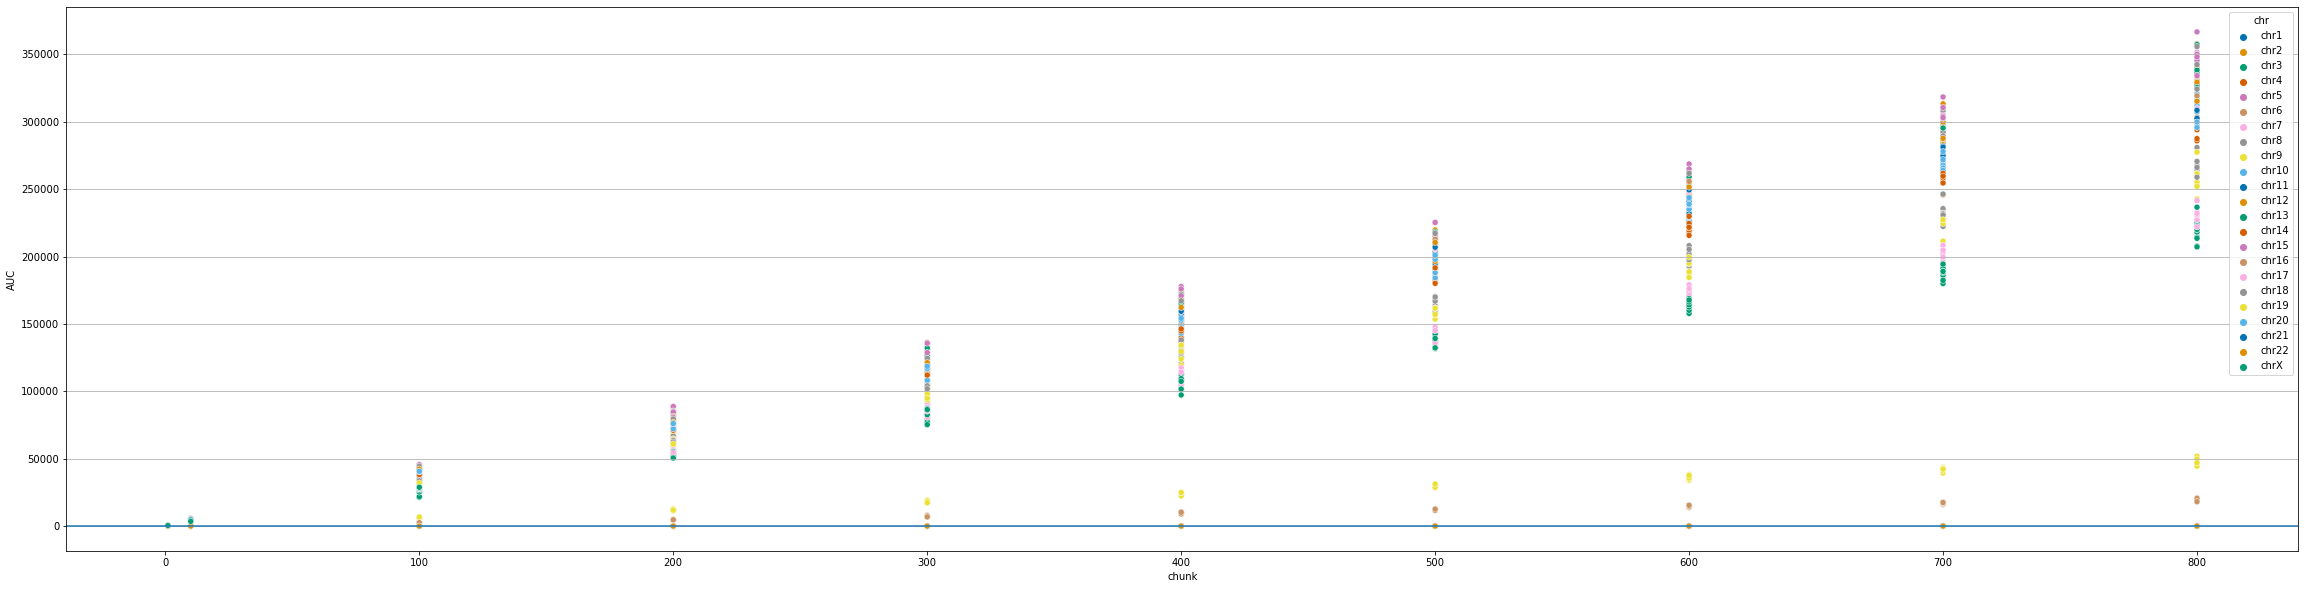

In [7]:
#original
for resoultion in [100]:
    for case in ['simple']:
        print (resoultion, case)
        #100 contacts
        import seaborn as sns
        import matplotlib.pyplot as plt
        fig, axes = plt.subplots(figsize=(40,10))
        #grouped = df_scores.groupby(['threshold'])

        #bp = grouped.boxplot(subplots=False, sym='k+', figsize=(8,10))
        #bp = df_scores.boxplot(column=['auc'], by=['chrm', 'dist_thresh'], ax=axes,rot=40, fontsize=8,layout=(2, 1))
        sns.scatterplot(y='map_resolution', x='chunk',
                         data=chunk_info , 
                         palette="colorblind", ax=axes
                         ,hue='chr'
                   )
        #ax2 = axes.twinx()
        #sns.catplot(data=df_1,  x='type', y='auc' ,hue='chr', kind="swarm")
        #plt.axhline(1.3)
        #sns.scatterplot(data=man_u_val, x="resolution", y="p_val_log")
        #bp = axes.boxplot([[x if x>=0 else -1 for x in top_500_score_auroc_0_9], [x if x>=0 else -1 for x in top_500_score_auroc_0_7], [x if x>=0 else -1 for x in top_500_score_auroc_0_5], [x if x>=0 else -1 for x in top_500_score_auroc_0_4]] , sym='k+')
        #axes.set_title('Predicting structure similarity from expression')
        axes.yaxis.grid(True)
        #axes.set_xlabel('Co-expression')
        axes.set_ylabel('AUC')
        axes.axhline(0.738)
        #axes.set_ylim([0.6,0.67])
        #plt.setp(bp['fliers'], markersize=3.0)

        plt.show()